# coffeeNet

In [21]:
import os
import json
import tensorflow as tf
from src.performance import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from dotenv import load_dotenv

In [ ]:
# Define constants
env = load_dotenv()

train_path = os.getenv('TRAIN_P')
test_path = os.getenv('TEST_P')
valid_path = os.getenv('VALID_P')
model_save_coffeeNet = os.getenv('MODEL_SAVE_COFFEENET')
history_save_coffeeNet = os.getenv('SAVE_HISTORY_COFFEENET')

input_shape = (224, 224, 3) 
num_classes = 4
batch_size = 32
epochs = 30

env

True

Building new CNN model

In [23]:
model = Sequential()

# 1st Conv Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convl Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th Conv Block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

/media/X/Research_coffee_classification/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-22 00:23:47.599401: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2024-09-22 00:23:47.618460: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.


need visualization**

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,267,268 (73.50 MB)

 Trainable params: 19,266,308 (73.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [25]:
# Initialize ImageDataGenerators
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
val_generator = val_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Convert Keras ImageDataGenerator to tf.data.Dataset with .repeat()
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, val_generator.num_classes), dtype=tf.float32)
    )
).repeat()

# Adjust steps_per_epoch and validation_steps if necessary
steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // batch_size

Found 3200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


Custom callbacks

In [29]:
from keras.callbacks import Callback

class AdjustLearningRate(Callback):
    def __init__(self, threshold=0.95, new_lr=0.00001):
        super(AdjustLearningRate, self).__init__()
        self.threshold = threshold  
        self.new_lr = new_lr        

    def on_epoch_end(self, epoch, logs=None):
       
        val_accuracy = logs.get('accuracy')
        if val_accuracy is not None and val_accuracy > self.threshold:
            current_lr = float(self.model.optimizer.learning_rate.numpy())
            

            if current_lr != self.new_lr:
                print(f"\naccuracy exceeded {self.threshold * 100:.2f}%.\nChanging learning rate.")
                self.model.optimizer.learning_rate = self.new_lr

In [ ]:
checkpoint = ModelCheckpoint(
    model_save_coffeeNet,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=0
)
adjust_lr = AdjustLearningRate(
    threshold=0.95, 
    new_lr=0.00001
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=0
)

In [31]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[
        checkpoint, 
        early_stopping, 
        adjust_lr
    ]
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.8150 - loss: 6.1897 - val_accuracy: 0.2604 - val_loss: 134.7135
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9698 - loss: 1.0978
accuracy exceeded 95.00%.
Changing learning rate.
100/100 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.9698 - loss: 1.0993 - val_accuracy: 0.3098 - val_loss: 98.6103
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9714 - loss: 0.8938
accuracy exceeded 95.00%.
Changing learning rate.
100/100 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.9714 - loss: 0.8923 - val_accuracy: 0.4293 - val_loss: 49.9526
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9801 - loss: 0.5963
accuracy exceeded 95.00%.
Changing learning rate.
100/100 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.9801 - loss: 0.5948 - val_accuracy: 0.6766 - val_loss: 10.3969
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9882 - loss: 0.3683
accuracy exceeded 95.0

In [ ]:
# save history & final model

model.save(model_save_coffeeNet)

with open(history_save_coffeeNet, 'w') as file:
    json.dump(history.history, file)

print('model & history saved')

model & history saved


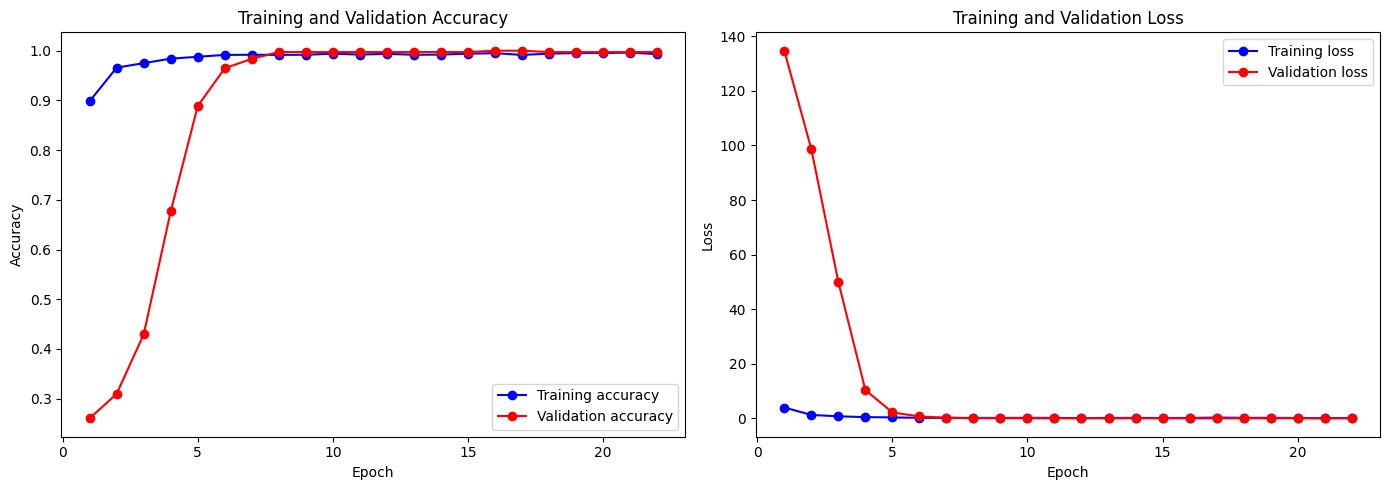

/media/X/Research_coffee_classification/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 774ms/step
Confusion Matrix


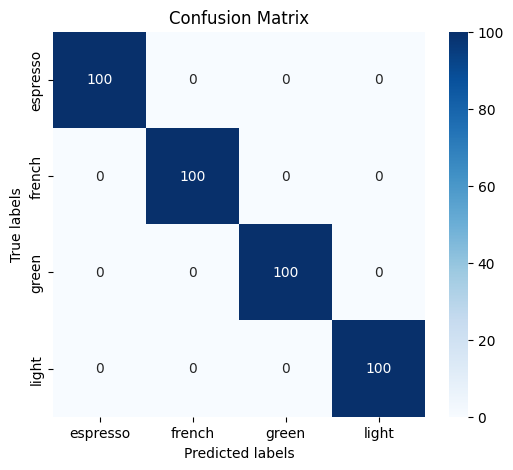

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 498ms/step
Classification Reports
              precision    recall  f1-score   support

    espresso       1.00      1.00      1.00       100
      french       1.00      1.00      1.00       100
       green       1.00      1.00      1.00       100
       light       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 485ms/step - accuracy: 1.0000 - loss: 1.2772e-10
Test Accuracy: 1.0
Test Loss: 8.940694851133912e-10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 501ms/step


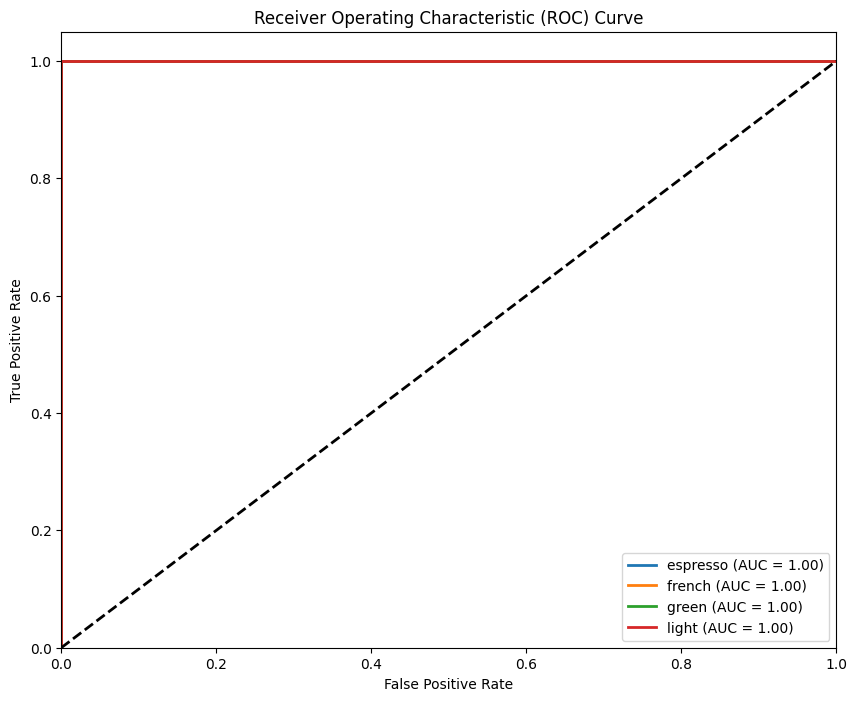

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 501ms/step
Misclassifications


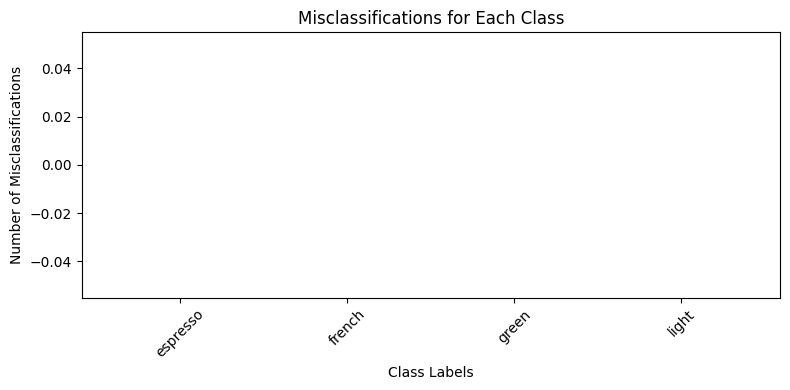

In [33]:
all_measurement(history,model,test_generator)

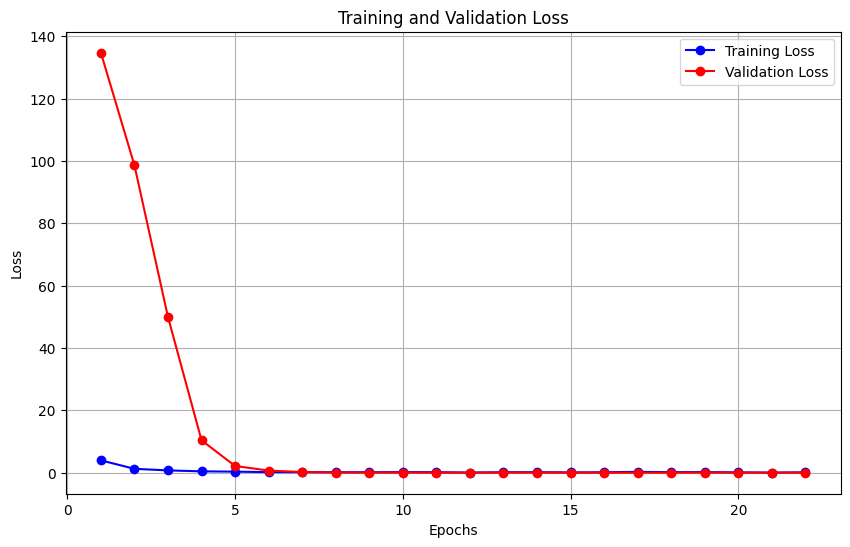

In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()